<a href="https://colab.research.google.com/github/yagnaVNK/Data-Mining-1/blob/main/Assignment1/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Declare all paths.

DATA_DIR = "\\".join(os.getcwd().split("\\")[:-1]) + "\\" + "DataSet"
ANNOTATIONS_DIR = DATA_DIR + "\\" + "Annotations"
IMG_DIR = DATA_DIR + "\\" + "Images"

In [1]:
def get_bounding_boxes(annot):
  xml = annot
  tree = ET.parse(xml)
  root = tree.getroot()
  objects = root.findall('object')
  bbox = []
  for o in objects:
    bndbox = o.find('bndbox')
    xmin = int(bndbox.find('xmin').text)
    ymin = int(bndbox.find('ymin').text)
    xmax = int(bndbox.find('xmax').text)
    ymax = int(bndbox.find('ymax').text)
    bbox.append((xmin,ymin,xmax,ymax))
  return bbox

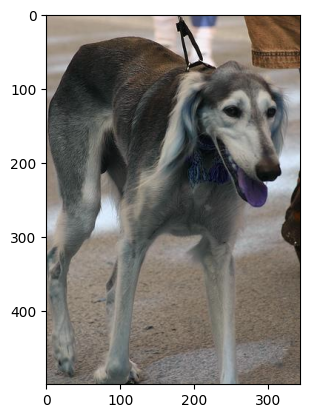

In [5]:
import cv2 as cv
import os
import matplotlib.pyplot as plt

DATA_DIR = "\\".join(os.getcwd().split("\\")[:-1]) + "\\" + "DataSet"
ANNOTATIONS_DIR = DATA_DIR + "\\" + "Annotations"

path = DATA_DIR + "\\" + "n02091831-Saluki" + "\\" + "n02091831_38.jpg"

img = cv.imread(path)
plt.imshow(img)
plt.show()

: 